# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos tiene modificaciones del original. Reduje el tamaño del conjunto para que los cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuve cuidado de conservar las distribuciones de los datos originales cuando hice los cambios.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, usé todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifiqué la información para cada DataFrame creado.


## Plan de solución

Generar DataFrames para cada uno de los archivos y posteriormente usar diversos métodos como info y head para evaluar de manera primaria los datos

In [1]:
import pandas as pd

In [2]:
orders= pd.read_csv('/datasets/instacart_orders.csv')
products= pd.read_csv('/datasets/products.csv')
aisles= pd.read_csv('/datasets/aisles.csv')
departments= pd.read_csv('/datasets/departments.csv')
order_products= pd.read_csv('/datasets/order_products.csv')

In [3]:
orders.info(show_counts=True)
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB
  order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0                        1515936;183418;11;6;13;30.0                              
1                          1690866;163593;5;5;12;9.0                              
2                           1454967;39980;4;5;19;2.0                              
3                         1768857;82516;56;0;20;10.0                              
4                         3007858;196724;2;4;12;17.0                              


In [4]:
products.info(show_counts=True)
print(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;aisle_id;department_id  49694 non-null  object
dtypes: object(1)
memory usage: 388.4+ KB
      product_id;product_name;aisle_id;department_id
0                 1;Chocolate Sandwich Cookies;61;19
1                          2;All-Seasons Salt;104;13
2        3;Robust Golden Unsweetened Oolong Tea;94;7
3  4;Smart Ones Classic Favorites Mini Rigatoni W...
4                   5;Green Chile Anytime Sauce;5;13


In [5]:
aisles.info(show_counts=True)
print()
print(aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB

                 aisle_id;aisle
0       1;prepared soups salads
1           2;specialty cheeses
2         3;energy granola bars
3               4;instant foods
4  5;marinades meat preparation


In [6]:
departments.info(show_counts=True)
print()
print(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes

  department_id;department
0                 1;frozen
1                  2;other
2                 3;bakery
3                4;produce
4                5;alcohol


In [7]:
order_products.info()
print()
print(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 1 columns):
 #   Column                                           Dtype 
---  ------                                           ----- 
 0   order_id;product_id;add_to_cart_order;reordered  object
dtypes: object(1)
memory usage: 34.7+ MB

  order_id;product_id;add_to_cart_order;reordered
0                            2141543;11440;17.0;0
1                               567889;1560;1.0;1
2                             2261212;26683;1.0;1
3                              491251;8670;35.0;1
4                              2571142;1940;5.0;1


## Conclusiones

Los datos al parecer no tienen conteo de nulos o inexistentes y no están bien ordenados, ya que los separa un ";". Se deben separar por este caracter para estudiar de una mejor manera

# Paso 2. Preprocesamiento de los datos

Preprocesando los datos de la siguiente manera:

- Verificar y corregir los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identificar y completar los valores ausentes.
- Identificar y eliminar los valores duplicados.

## Plan de solución

Usar el método sep= para darle formato a los datos que tenemos usando el caracter ";", esto nos dará una idea de como evaluar los valores ausentes y duplicados 

## Encuentra y elimina los valores duplicados.

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados

orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

print(orders[orders.duplicated()])
print()
print(f'Numero total de duplicados')
print(orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Fueron a las 2 am el día 3 de la semana

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

ordenes_2am = orders[orders['order_hour_of_day'] == 2]

print(ordenes_2am)
print()
ordenes_2am.info()

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145      1373529   143518             8          1                  2   
169      3129415   201917             4          1                  2   
894      2672805   134969            41          0                  2   
950       284735     8831             4          5                  2   
1260     2537018     7543            23          1                  2   
...          ...      ...           ...        ...                ...   
477526   2592344    46860            38          3                  2   
477624   1448965   201408             4          6                  2   
477920   2668224   139740             3          6                  2   
478126    852233    71024             1          4                  2   
478321   1629284    54187            12          6                  2   

        days_since_prior_order  
145                       30.0  
169                        8.0  
894                     

¿Qué sugiere este resultado?

Son pocas las ordenes duplicadas a las 2 am

In [10]:
# Elimina los pedidos duplicados

orders_no_dup = orders.drop_duplicates()
print(orders_no_dup)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [11]:
# Vuelve a verificar si hay filas duplicadas

print(f'Numero total de duplicados')
print(orders_no_dup.duplicated().sum())

Numero total de duplicados
0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos

print(orders_no_dup[orders_no_dup['order_id'].duplicated()])
print()
print(f'Numero total de duplicados')
print(orders_no_dup[orders_no_dup['order_id'].duplicated()].sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Numero total de duplicados
order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas

products= pd.read_csv('/datasets/products.csv', sep=';')

print(f'Numero total de duplicados')
print(products.duplicated().sum())

Numero total de duplicados
0


In [14]:
# Verifica si hay IDs duplicadas de productos

print(products[products['product_id'].duplicated()])
      

print(f'Numero total de duplicados')
print(products[products['product_id'].duplicated()].sum())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
Numero total de duplicados
product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)

products['product_name']= products['product_name'].str.upper()

print(products[products['product_name'].duplicated()])
print()
print(f'Numero total de duplicados')
print(products[products['product_name'].duplicated()].sum())

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes

print(products[products['product_name'].duplicated()])
print()
print(products[products['product_name'].duplicated()].sum())

#No entiendo bien la descripción de "nombre duplicados de productos no faltantes", no se si se refiere a valores NaN, valores ausentes o valores duplicados o cual es la sintaxis o contexto de la instrucción

       product_id                                     product_name  aisle_id  \
71             72                                              NaN       100   
109           110                                              NaN       100   
296           297                                              NaN       100   
416           417                                              NaN       100   
436           437                                              NaN       100   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
71              

Tenemos algunos valores ausentes en la columna de product_name, asimismo, en la misma columna tenemos valores duplicados. 
También tenemos muchos valores NaN en product_name

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas

departments= pd.read_csv('/datasets/departments.csv', sep=';')

print(departments[departments['department'].duplicated()])
print()
print(f'Numero total de duplicados')
print(departments[departments['department'].duplicated()].sum())

Empty DataFrame
Columns: [department_id, department]
Index: []

Numero total de duplicados
department_id    0.0
department       0.0
dtype: float64


In [18]:
# Revisa si hay IDs duplicadas de productos

print(departments['department_id'].duplicated())
print()
print(f'Numero total de duplicados')
print(departments['department_id'].duplicated().sum())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: department_id, dtype: bool

Numero total de duplicados
0


No se si estuvo bien solo buscar en las Id de departamento o querían otra información adicional. Aqui no se encontraron hallazgos significativos mas que algunos departamentos como "dry gooods pasta", dairy eggs y missing que hay que investigar a que se refiere o que items trae

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas

aisles= pd.read_csv('/datasets/aisles.csv', sep=';')

print(aisles[aisles['aisle'].duplicated()])
print()
print(f'Numero total de duplicados')
print(aisles[aisles['aisle'].duplicated()].sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Numero total de duplicados
aisle_id    0.0
aisle       0.0
dtype: float64


In [20]:
# Revisa si hay IDs duplicadas de productos

print(aisles[aisles['aisle_id'].duplicated()])
print()
print(f'Numero total de duplicados')
print(aisles[aisles['aisle'].duplicated()].sum())

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Numero total de duplicados
aisle_id    0.0
aisle       0.0
dtype: float64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Busqué duplicados y no encontré algo raro con lo que trabajar

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas

order_products= pd.read_csv('/datasets/order_products.csv', sep=';')

print(order_products[order_products['order_id'].duplicated()])
print()
print(f'Numero total de duplicados')
print(order_products['order_id'].duplicated().sum())


         order_id  product_id  add_to_cart_order  reordered
367       2867619       48094                9.0          0
824        844425       39408               10.0          1
1124      3319857       37067               19.0          0
1258      1038788       12471               14.0          0
1303      2825714       44632               16.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4094961 rows x 4 columns]

Numero total de duplicados
4094961


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products[order_products['product_id'].duplicated()])
print()
print(f'Numero total de duplicados')
print(order_products[order_products['product_id'].duplicated()].sum())

         order_id  product_id  add_to_cart_order  reordered
19        2500729       21616                5.0          1
20        1687771       22963                5.0          1
75        2186234       13176                2.0          1
78         145751       47626                8.0          1
80         497429       26209                9.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4499434 rows x 4 columns]

Numero total de duplicados
order_id             7.698961e+12
product_id           1.151319e+11
add_to_cart_order    3.753828e+07
reordered            2.666194e+06
dtype: float64


Deduzco sobre esto que los order id se duplican por cada producto en la orden lo que provoca que puedan haber más filas, se podría solucionar, haciendo una columna por cada artículo y tener una sola linea por orden

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])
print()
print(products['product_name'].value_counts(dropna=False))
print()
print(f'Numero total de valores ausentes')
print(products['product_name'].isna().sum())

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]

NaN                                            1258
GREEN TEA WITH GINSENG AND HONEY                  3
FLAT FILLETS OF ANCHOVIES IN PURE OLIVE OIL       2
MARASCHINO CHERRIES WITH STEMS                    2
ORIGINAL BBQ SAUCE                                2
                                          

Hay muchos nombres de producto sin valores o NaN

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el aisle_id 100?

vacios = products[products['product_name'].isna()]
print(vacios.query("aisle_id == 100")[['product_name', 'aisle_id']])

      product_name  aisle_id
37             NaN       100
71             NaN       100
109            NaN       100
296            NaN       100
416            NaN       100
...            ...       ...
49552          NaN       100
49574          NaN       100
49640          NaN       100
49663          NaN       100
49668          NaN       100

[1258 rows x 2 columns]


Los valores ausentes en la columna product name están relacionados al pasillo 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
vacios_id_21 = products[products['product_name'].isna()]
print(vacios_id_21.query("department_id == 21")[['product_name', 'department_id']])

      product_name  department_id
37             NaN             21
71             NaN             21
109            NaN             21
296            NaN             21
416            NaN             21
...            ...            ...
49552          NaN             21
49574          NaN             21
49640          NaN             21
49663          NaN             21
49668          NaN             21

[1258 rows x 2 columns]


Todos los ausentes se encuentran en el department_id 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
department_21 = products.query("department_id == 21")
print(department_21.query("aisle_id == 100")[['product_name', 'department_id', 'aisle_id']])

      product_name  department_id  aisle_id
37             NaN             21       100
71             NaN             21       100
109            NaN             21       100
296            NaN             21       100
416            NaN             21       100
...            ...            ...       ...
49552          NaN             21       100
49574          NaN             21       100
49640          NaN             21       100
49663          NaN             21       100
49668          NaN             21       100

[1258 rows x 3 columns]


Al parecer no hay datos que no sean vacios del department_id 21 y del aisle_id 100

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products['product_name'].head(25))

0                            CHOCOLATE SANDWICH COOKIES
1                                      ALL-SEASONS SALT
2                  ROBUST GOLDEN UNSWEETENED OOLONG TEA
3     SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                             GREEN CHILE ANYTIME SAUCE
5                                          DRY NOSE OIL
6                        PURE COCONUT WATER WITH ORANGE
7                     CUT RUSSET POTATOES STEAM N' MASH
8                     LIGHT STRAWBERRY BLUEBERRY YOGURT
9        SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE
10                                    PEACH MANGO JUICE
11                           CHOCOLATE FUDGE LAYER CAKE
12                                    SALINE NASAL MIST
13                       FRESH SCENT DISHWASHER CLEANER
14                             OVERNIGHT DIAPERS SIZE 6
15                        MINT CHOCOLATE FLAVORED SYRUP
16                                    RENDERED DUCK FAT
17                  PIZZA FOR ONE SUPREMA  FROZE

Al parecer no hay datos que no sean vacios del department_id 21 y del aisle_id 100, fueron encontrados y reemplazados por el valor Unknwon

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(f'Numero total de valores ausentes')
print(orders[orders['days_since_prior_order'].isna()])
print()
print(f'Numero total de valores ausentes')
print(orders.isna().sum())
print()
print(f'Numero total de valores ausentes')
print(orders['days_since_prior_order'].isna().sum())

Numero total de valores ausentes
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                      

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?

primer_pedido = orders[orders['days_since_prior_order'].isna()]
print(primer_pedido.query("order_number > 1")[['order_id', 'days_since_prior_order']])
print()
print(primer_pedido.query("order_number == 1")[['order_id', 'days_since_prior_order']])

Empty DataFrame
Columns: [order_id, days_since_prior_order]
Index: []

        order_id  days_since_prior_order
28        133707                     NaN
96        787445                     NaN
100       294410                     NaN
103      2869915                     NaN
104      2521921                     NaN
...          ...                     ...
478895   2589657                     NaN
478896   2222353                     NaN
478922   2272807                     NaN
478926   2499542                     NaN
478945   1387033                     NaN

[28819 rows x 2 columns]


Los vacios son en la primer orden del cliente, por lo que es entendible porque no hay un dato desde la orden anterior

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(f'Numero total de valores ausentes')
print(order_products.isna().sum())
print(f'Numero total de valores ausentes')
print(order_products[order_products['add_to_cart_order'].isna()])
print()

Numero total de valores ausentes
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
Numero total de valores ausentes
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]



In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(f'Valor Mínimo')
print(order_products['add_to_cart_order'].min())
print()
print(f'Valor Máximo')
print(order_products['add_to_cart_order'].max())
print()

Valor Mínimo
1.0

Valor Máximo
64.0



Describe brevemente cuáles son tus hallazgos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
ausentes_2 = order_products[order_products['add_to_cart_order'].isna()]
id_de_pedidos = ausentes_2['order_id'].tolist()

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

vacios_2 = order_products[order_products['add_to_cart_order'].isna()]
conteo = vacios_2['order_id'].value_counts()
conteo_pedidos = conteo[conteo > 64].all()
if conteo_pedidos == True:
    print('Todos los valores ausentes tienen más de 64 productos')

print()
agrupados = vacios_2.groupby('order_id')
print(agrupados.size())
print()
conteo_product_id = agrupados['product_id'].value_counts()
print(conteo_product_id.head(10))
print()
print('Valor mínimo del conteo')
print(conteo_product_id.min())

Todos los valores ausentes tienen más de 64 productos

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Length: 70, dtype: int64

order_id  product_id
9310      25753         1
61355     1087          1
          1203          1
          1700          1
          3390          1
          4781          1
          5322          1
          5552          1
          7681          1
          8381          1
Name: product_id, dtype: int64

Valor mínimo del conteo
1


Describe brevemente cuáles son tus hallazgos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999')
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products['add_to_cart_order'].isna())

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Name: add_to_cart_order, Length: 4545007, dtype: bool


Puede tratarse de un error donde al tener más de 64 productos se deja de llenar la columna add to cart.

## Conclusiones

Puede tratarse de un error donde al tener más de 64 productos se deja de llenar la columna add to cart., no hay un algoritmo o bucle que nos diga que valor poner si es la primera orden y los valores del aisle 100 no están bien colocados

# Paso 3. Análisis de los datos

Una vez los datos estén procesados se hace el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crear un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crear un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crear un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print('Valor minimo hora del dia')
print(orders['order_hour_of_day'].min())
print()
print('Valor maximo hora del dia')
print(orders['order_hour_of_day'].max())

Valor minimo hora del dia
0

Valor maximo hora del dia
23


In [36]:
print('Valor minimo dia de la semana')
print(orders['order_dow'].min())
print()
print('Valor maximo dia de la semana')
print(orders['order_dow'].max())

Valor minimo dia de la semana
0

Valor maximo dia de la semana
6


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

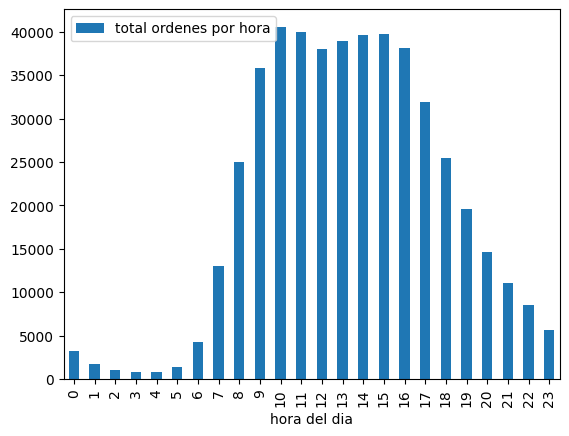

In [37]:
from matplotlib import pyplot as plt

ordenes_por_hora = orders['order_hour_of_day'].value_counts().sort_index()
conteo_por_hora = ordenes_por_hora.reset_index().rename(columns={'index': 'hora del dia', 'order_hour_of_day': 'total ordenes por hora'})

conteo_por_hora.plot(x='hora del dia', y='total ordenes por hora', kind='bar')
plt.show()

In [2]:
# En la hora 10 se aprecian más ordenes realizadas, posteriormente las 11 y ve descendiendo, siendo las 4 am la hora con menos pedidos realizados

### [A3] ¿Qué día de la semana compran víveres las personas?

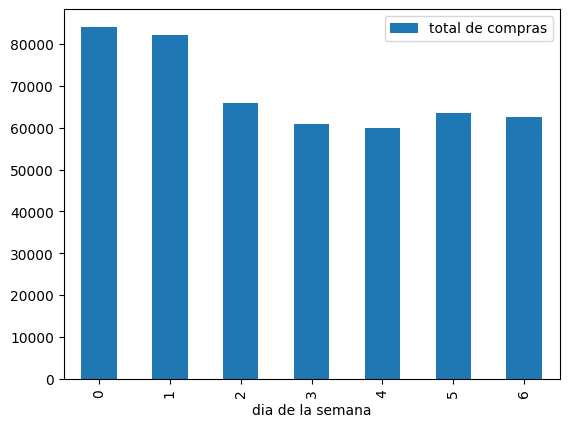

In [38]:
ordenes_por_dia = orders['order_dow'].value_counts().sort_index()
ordenes_por_dia = ordenes_por_dia.reset_index().rename(columns={'index': 'dia de la semana', 'order_dow': 'total de compras'})

ordenes_por_dia.plot(x='dia de la semana', y='total de compras', kind='bar')
plt.show()

Los días 0 o domingos(?) son los días que más se realizan más compras

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

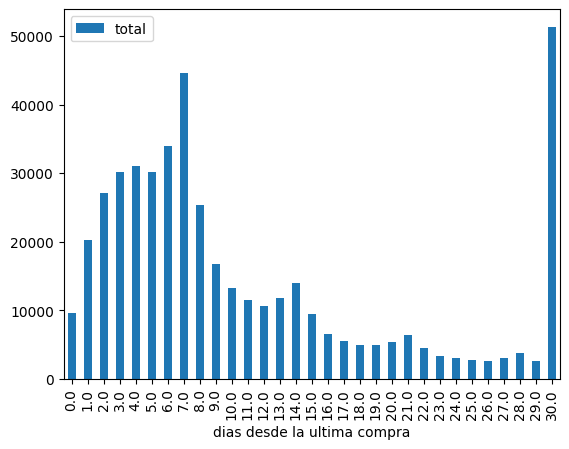

Valor minimo desde último pedido
0.0 dias

Valor promedio desde último pedido
11.101750979677794 dias

Valor maximo desde último pedido
30.0 dias


In [39]:
dias_ultima_compra = orders['days_since_prior_order'].value_counts().sort_index()
dias_ultima_compra = dias_ultima_compra.reset_index().rename(columns={'index': 'dias desde la ultima compra', 'days_since_prior_order':'total'})

dias_ultima_compra.plot(x='dias desde la ultima compra', y='total', kind='bar')

plt.show()

print('Valor minimo desde último pedido')
print(orders['days_since_prior_order'].min(), f'dias')
print()
print('Valor promedio desde último pedido')
print(orders['days_since_prior_order'].mean(), f'dias')
print()
print('Valor maximo desde último pedido')
print(orders['days_since_prior_order'].max(), f'dias')

En promedio son 11 días en lo que las personas esperan para hacer un nuevo pedido, aunque hay algunas que hacen pedidos al siguiente día.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

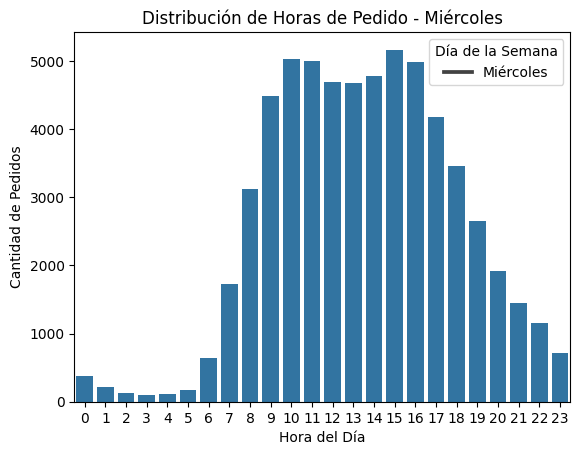

En general los dias miercoles se hacen mas compras a las 15 horas, siendo esta la hora con mas compras de los miercoles


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

counts = orders.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='count')

wednesdays = counts[counts['order_dow'] == 3]

sns.barplot(x='order_hour_of_day', y='count', hue='order_dow', data=wednesdays)
sns.set_palette("pastel")
plt.title('Distribución de Horas de Pedido - Miércoles')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Pedidos')
plt.legend(title='Día de la Semana', labels=['Miércoles'])
plt.show()

print(f'En general los dias miercoles se hacen mas compras a las 15 horas, siendo esta la hora con mas compras de los miercoles')

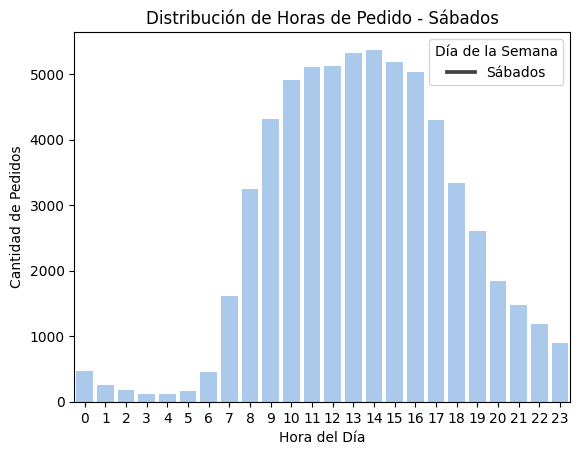

En general se hacen mas compras a las 14 horas, siendo esta la hora con mas compras


In [41]:
counts = orders.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='count')

saturdays = counts[counts['order_dow'] == 6]

sns.barplot(x='order_hour_of_day', y='count', hue='order_dow', data=saturdays)
sns.set_palette("pastel")
plt.title('Distribución de Horas de Pedido - Sábados')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Pedidos')
plt.legend(title='Día de la Semana', labels=['Sábados'])
plt.show()

print(f'En general se hacen mas compras a las 14 horas, siendo esta la hora con mas compras')

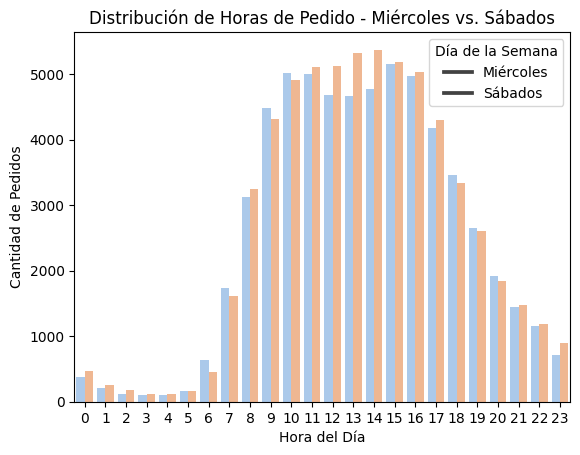

En general los dias sabados se hacen mas compras en compracion con los miercoles, siendo las 14 horas la hora con mas compras


In [42]:
counts = orders.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='count')

wednesdays = counts[counts['order_dow'] == 3]
saturdays = counts[counts['order_dow'] == 6]

combined_data = pd.concat([wednesdays, saturdays])

sns.barplot(x='order_hour_of_day', y='count', hue='order_dow', data=combined_data)
sns.set_palette("pastel")
plt.title('Distribución de Horas de Pedido - Miércoles vs. Sábados')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Pedidos')
plt.legend(title='Día de la Semana', labels=['Miércoles', 'Sábados'])
plt.show()

print(f'En general los dias sabados se hacen mas compras en compracion con los miercoles, siendo las 14 horas la hora con mas compras')

En general los dias sabados se hacen mas compras en compracion con los miercoles, siendo las 15 horas la hora con mas compras,
asimismo, entre las 0 y las 5 horas disminuye mucho el numero de pedidos realizados en ambos días

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
# Grafica la distribución para el número de órdenes que hacen los clientes (es decir, 
# cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente

ordenes_por_cliente = orders['user_id'].value_counts().value_counts().reset_index().rename(columns={'index': 'numero de ordenes', 'user_id':'veces realizadas'})
print(ordenes_por_cliente)


    numero de ordenes  veces realizadas
0                   1             55355
1                   2             36508
2                   3             21548
3                   4             13498
4                   5              8778
5                   6              6012
6                   7              4240
7                   8              3016
8                   9              2153
9                  10              1646
10                 11              1308
11                 12               948
12                 13               701
13                 14               514
14                 15               437
15                 16               263
16                 17               184
17                 18               121
18                 19                85
19                 20                52
20                 22                23
21                 21                22
22                 23                19
23                 24                 3


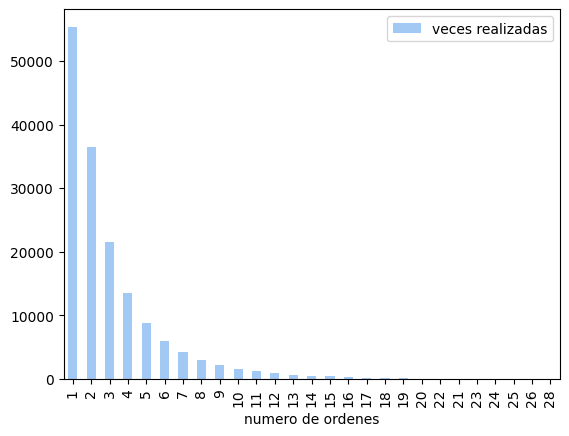

In [44]:
ordenes_por_cliente.plot(x='numero de ordenes', y='veces realizadas', kind='bar')

plt.show()

El mayor numero de repeticiones es que los clientes realizan solo una compra, posteriormente disminuye el numero de veces de repeticion de comras

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
popular = order_products['product_id'].value_counts().reset_index().rename(columns={'index': 'product_id', 'product_id':'veces compradas'})
print(popular.head(20))

popular_2 = popular['product_id'].head(20)

    product_id  veces compradas
0        24852            66050
1        13176            53297
2        21137            37039
3        21903            33971
4        47209            29773
5        47766            24689
6        47626            21495
7        16797            20018
8        26209            19690
9        27845            19600
10       27966            19197
11       22935            15898
12       24964            15292
13       45007            14584
14       39275            13879
15       49683            13675
16       28204            12544
17        5876            12232
18        8277            11993
19       40706            11781


In [46]:
productos = products[['product_id','product_name']]

print(productos)

       product_id                                       product_name
0               1                         CHOCOLATE SANDWICH COOKIES
1               2                                   ALL-SEASONS SALT
2               3               ROBUST GOLDEN UNSWEETENED OOLONG TEA
3               4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4               5                          GREEN CHILE ANYTIME SAUCE
...           ...                                                ...
49689       49690                      HIGH PERFORMANCE ENERGY DRINK
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692       49693                             SPRING WATER BODY WASH
49693       49694                            BURRITO- STEAK & CHEESE

[49694 rows x 2 columns]


In [47]:
mezcla = pd.merge(popular_2, productos, on='product_id', how='inner')
print(mezcla)

    product_id              product_name
0        24852                    BANANA
1        13176    BAG OF ORGANIC BANANAS
2        21137      ORGANIC STRAWBERRIES
3        21903      ORGANIC BABY SPINACH
4        47209      ORGANIC HASS AVOCADO
5        47766           ORGANIC AVOCADO
6        47626               LARGE LEMON
7        16797              STRAWBERRIES
8        26209                     LIMES
9        27845        ORGANIC WHOLE MILK
10       27966       ORGANIC RASPBERRIES
11       22935      ORGANIC YELLOW ONION
12       24964            ORGANIC GARLIC
13       45007          ORGANIC ZUCCHINI
14       39275       ORGANIC BLUEBERRIES
15       49683            CUCUMBER KIRBY
16       28204        ORGANIC FUJI APPLE
17        5876             ORGANIC LEMON
18        8277  APPLE HONEYCRISP ORGANIC
19       40706    ORGANIC GRAPE TOMATOES


Se compran más frutas, lo que los convierte en los mas popular, asimismo, parece que los productos orgánicos son bastante populares

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
# ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?

In [49]:
ordenes_agrupadas = order_products.groupby('order_id')

conteo_articulos = ordenes_agrupadas.size()

promedio_articulos = conteo_articulos.mean()

print(promedio_articulos)

10.098983215049127


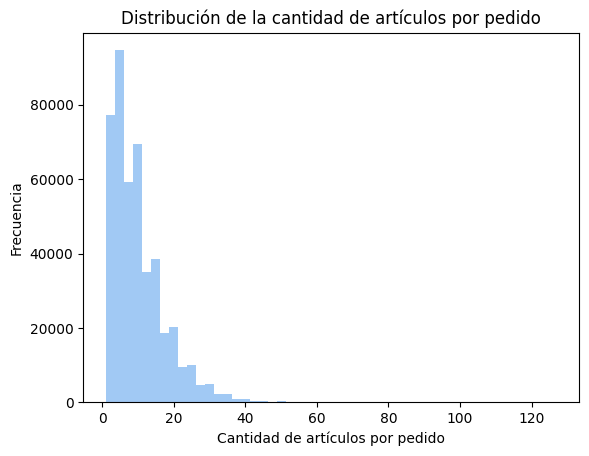

In [50]:
plt.hist(conteo_articulos, bins=50)
plt.xlabel('Cantidad de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de la cantidad de artículos por pedido')
plt.show()

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
# ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia 
# (muestra sus nombres e IDs de los productos)?



In [52]:
productos_reordenados = order_products[order_products['reordered'] >= 1]

conteo_reordenados = productos_reordenados['product_id'].value_counts()

top_20_reordenados = conteo_reordenados.nlargest(20)

top_20_reordenados = top_20_reordenados.reset_index().rename(columns={'index': 'product_id', 'product_id':'veces reordenado'})

print(top_20_reordenados)

    product_id  veces reordenado
0        24852             55763
1        13176             44450
2        21137             28639
3        21903             26233
4        47209             23629
5        47766             18743
6        27845             16251
7        47626             15044
8        27966             14748
9        16797             13945
10       26209             13327
11       22935             11145
12       24964             10411
13       45007             10076
14       49683              9538
15       28204              8989
16        8277              8836
17       39275              8799
18        5876              8412
19       49235              8389


In [53]:
mezcla_2 = pd.merge(top_20_reordenados, productos, on='product_id', how='inner')
print(mezcla_2)

    product_id  veces reordenado              product_name
0        24852             55763                    BANANA
1        13176             44450    BAG OF ORGANIC BANANAS
2        21137             28639      ORGANIC STRAWBERRIES
3        21903             26233      ORGANIC BABY SPINACH
4        47209             23629      ORGANIC HASS AVOCADO
5        47766             18743           ORGANIC AVOCADO
6        27845             16251        ORGANIC WHOLE MILK
7        47626             15044               LARGE LEMON
8        27966             14748       ORGANIC RASPBERRIES
9        16797             13945              STRAWBERRIES
10       26209             13327                     LIMES
11       22935             11145      ORGANIC YELLOW ONION
12       24964             10411            ORGANIC GARLIC
13       45007             10076          ORGANIC ZUCCHINI
14       49683              9538            CUCUMBER KIRBY
15       28204              8989        ORGANIC FUJI APP

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [54]:
# Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
product_orders = order_products.groupby('product_id')['order_id'].count()
print(product_orders)


product_id
1        280
2         11
3         42
4         49
7          2
        ... 
49690      5
49691     72
49692     12
49693     25
49694      9
Name: order_id, Length: 45573, dtype: int64


In [55]:
product_reorders = order_products[order_products['reordered'] > 0].groupby('product_id')['order_id'].count()

print(product_reorders)


product_id
1        158
3         31
4         25
7          1
8          6
        ... 
49690      4
49691     31
49692      5
49693     11
49694      3
Name: order_id, Length: 36228, dtype: int64


In [56]:
product_orders = order_products.groupby('product_id')['order_id'].count()

product_reorders = order_products[order_products['reordered'] > 0].groupby('product_id')['order_id'].count()

reorder_proportion = product_reorders / product_orders

reorder_proportion = reorder_proportion.reset_index().rename(columns={'index': 'product_id', 'order_id':'Proporción de reorden'})

print(reorder_proportion)


       product_id  Proporción de reorden
0               1               0.564286
1               2                    NaN
2               3               0.738095
3               4               0.510204
4               7               0.500000
...           ...                    ...
45568       49690               0.800000
45569       49691               0.430556
45570       49692               0.416667
45571       49693               0.440000
45572       49694               0.333333

[45573 rows x 2 columns]


La mayoría de los productos son reordenados. Product_id 2 no existe(?)

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [57]:
merge_tables  = orders.merge(order_products, on = 'order_id', how = 'left')
print(merge_tables)

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0         1515936   183418            11          6                 13   
1         1515936   183418            11          6                 13   
2         1515936   183418            11          6                 13   
3         1515936   183418            11          6                 13   
4         1515936   183418            11          6                 13   
...           ...      ...           ...        ...                ...   
4574054   2071924     1730            18          1                 14   
4574055   2071924     1730            18          1                 14   
4574056   2071924     1730            18          1                 14   
4574057   2071924     1730            18          1                 14   
4574058   2071924     1730            18          1                 14   

         days_since_prior_order  product_id  add_to_cart_order  reordered  
0                          30.0    

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 157437, dtype: float64


<AxesSubplot:>

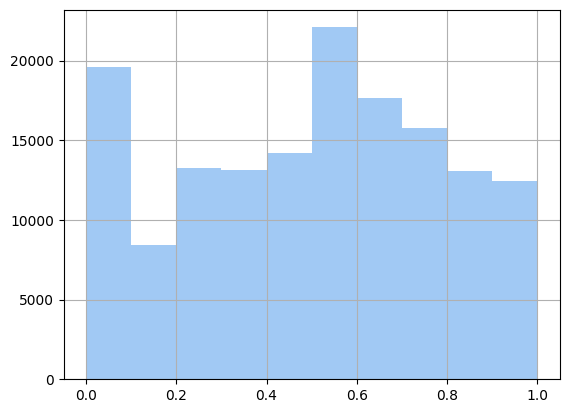

In [58]:
mean_reordered_per_client = merge_tables.groupby('user_id')['reordered'].mean()
print(mean_reordered_per_client)

mean_reordered_per_client.hist()

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
first_to_added = order_products.query('add_to_cart_order ==1')
print(first_to_added)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]


In [60]:
first_added_count = first_to_added.groupby('product_id')['reordered'].count()
print(first_added_count)

product_id
1        47
2         2
3         5
4         1
8         4
         ..
49687     1
49688     1
49690     2
49691     3
49693     3
Name: reordered, Length: 26760, dtype: int64


In [70]:
first_added = first_added_count.sort_values(ascending = False)
first_added = first_added.head(20)
print(first_added)
first_added = first_added.index.tolist()

print()
products_first_added = products.query('product_id in @first_added')
print(products_first_added[['product_id', 'product_name' ]])

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
21903     3336
47766     3044
19660     2336
16797     2308
27966     2024
44632     1914
49235     1797
47626     1737
196       1733
38689     1397
26209     1370
12341     1340
5785      1310
27086     1309
43352     1246
Name: reordered, dtype: int64

       product_id                 product_name
195           196                         SODA
5784         5785  ORGANIC REDUCED FAT 2% MILK
12340       12341                HASS AVOCADOS
13175       13176       BAG OF ORGANIC BANANAS
16796       16797                 STRAWBERRIES
19659       19660                 SPRING WATER
21136       21137         ORGANIC STRAWBERRIES
21902       21903         ORGANIC BABY SPINACH
24851       24852                       BANANA
26208       26209                        LIMES
27085       27086                  HALF & HALF
27844       27845           ORGANIC WHOLE MILK
27965       27966          ORGANIC RASPBERRIES


La banana en primer lugar como producto que más se añade al carrito como primer producto, los productos orgánicos siguen siendo de las primeras cosas que la gente busca rpiorizar en sus compras


### Conclusion general del proyecto:

In [ ]:
A la gente le gusta comprar cosas orgánicas y por lo general no lo hacen en la madrugada, buscan horas cercanas para realizar sus compras, 
por lo que sugiere que tienen esos tiempos libres, aunque eso es otro tema de estudio.

fue un proyecto largo y que me hizo darme a la tarea de realizar muchas horas de estudio y repaso de los apuntes y de las lecciones.

Espero haber realizado bien las actividades.